### Machine Learning with Tensorflow

[Variable Sequence Lengths in Tensorflow](https://danijar.com/variable-sequence-lengths-in-tensorflow/): What now? Luckily

The following is from the [tensorflow.org](https://www.tensorflow.org/overview) website.

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2980 - acc: 0.9134
Epoch 2/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1411 - acc: 0.9588
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1075 - acc: 0.9676
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0890 - acc: 0.9727
Epoch 5/5
10000/10000 [==============================] - 0s 35us/sample - loss: 0.0750 - acc: 0.9761


[0.07501640421058983, 0.9761]

That's cool, but what does it do, and what do I do with it? Luckily, there's another [tutorials](https://www.tensorflow.org/tutorials/keras/basic_classification/): 

In [2]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


Here, we are importing a few libraries: 
* tensoflow, to be referenced as tf
* keras, part of the tensorflow module
* numpy, to be referenced as np
* matplotlib.pyplot to be referenced as plt

Then we print the version of the tensorflow. If this worked and you see a version number, we can proceed.

Below, we import the fashion data model. 

I believe this technique is called a destructuring assignment. `fasion_mnist.load_data()` returns four objects.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Below, some statistics about our dataset:

In [5]:
print('Shape of the training image dataset: ', train_images.shape)
print('Number of training images:', len(train_labels))

Shape of the training image dataset:  (60000, 28, 28)
Number of training images: 60000


I think labels ultimately means output, or output space. 

In [6]:
print('The list of training labels:', train_labels.__repr__())

The list of training labels: array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)


In [7]:
print('The shape of the test dataset: ', test_images.shape)
print('Number of test images:', len(test_images))

The shape of the test dataset:  (10000, 28, 28)
Number of test images: 10000


Here, we display one of the training images.

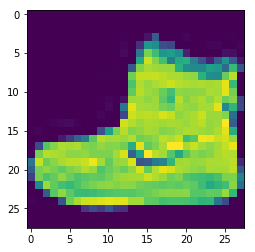

In [8]:
plt.figure()
plt.imshow(train_images[0])
# plt.colorbar()
plt.grid(False)
plt.show()

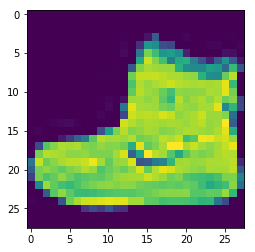

In [23]:
def show(image):
    plt.figure()
    plt.imshow(image)
    plt.grid(False)
    plt.show()

show(train_images[0])

According to the tutorial, both training and test data must be processed the same way. 

I don't know what the division operator does, applied to a dataset and a number. 

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
len(train_images)

60000

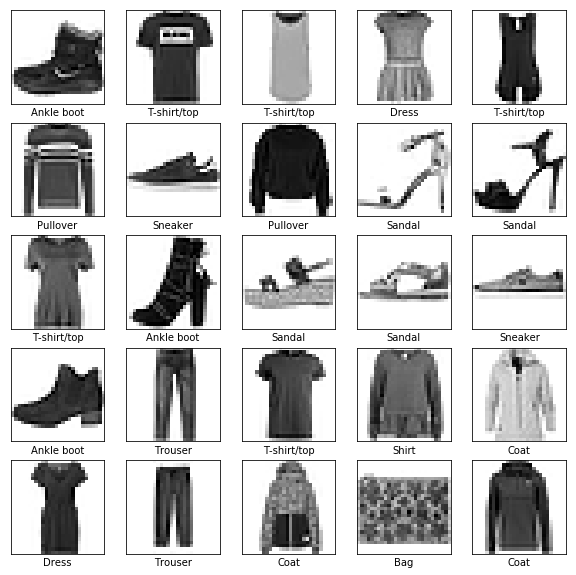

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Hey, that's cool!

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [19]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2797 - acc: 0.8973
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2661 - acc: 0.9023
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2562 - acc: 0.9056
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2476 - acc: 0.9080
Epoch 5/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2372 - acc: 0.9109
Epoch 6/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2301 - acc: 0.9140
Epoch 7/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2214 - acc: 0.9182
Epoch 8/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2164 - acc: 0.9183
Epoch 9/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2098 - acc: 0.9219
Epoch 10/10
60000/60000 [==============================] - 6s 105us/sample - l

On the first run-through, I did what the tutorial said and trained with 5 epochs. This time I tried ten, and increased reported testing accuracy by a few percent. It'd be interesting to see the effect of the number of epchs on reported accuracy. 

In [51]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3618 - acc: 0.8841
Test accuracy: 0.8841


In [22]:
predictions = model.predict(test_images)

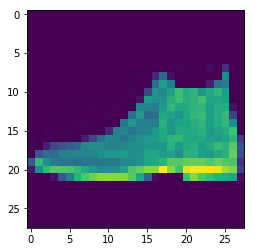


highest confidence:  Sneaker 0.9500453


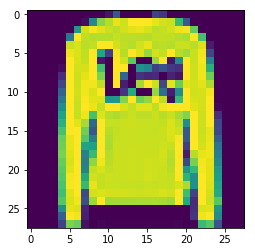


highest confidence:  Trouser 0.997297


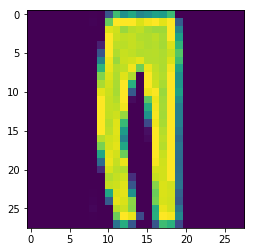


highest confidence:  Pullover 0.9999994


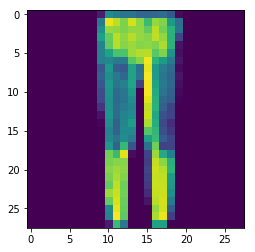


highest confidence:  Pullover 0.9999945


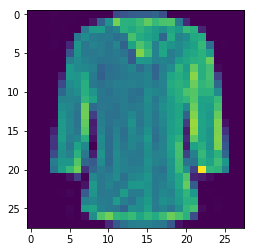


highest confidence:  Coat 0.6203468


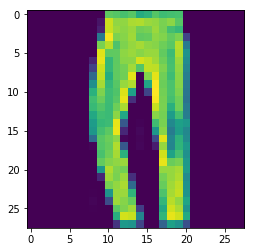


highest confidence:  Pullover 0.99971396


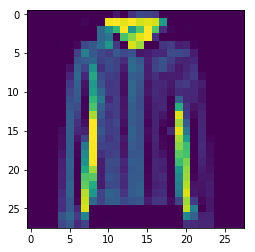


highest confidence:  Shirt 0.9353597


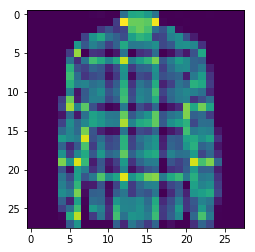


highest confidence:  Coat 0.98276937


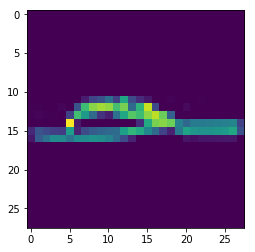


highest confidence:  Trouser 0.9965604


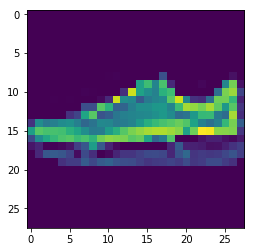


highest confidence:  Shirt 0.9995623


In [49]:
from IPython.core.display import display, HTML

for j in range(0, 10):
    prediction = predictions[j]
    show(test_images[j])
    #for i in range(1, 10):
    #    print(i, prediction[i])

    print('')
    
    print('highest confidence: ', class_names[test_labels[np.argmax(prediction)]], np.max(prediction))
    display(HTML('<hr>'))


In [43]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

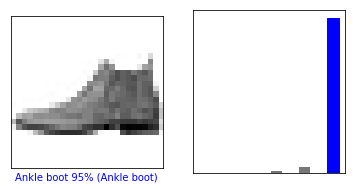

In [44]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

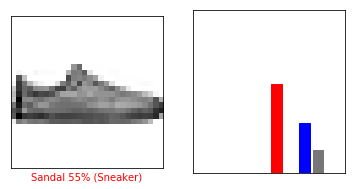

In [45]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()